In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/'My Drive'/datasets/MNIST
%ls

/gdrive/My Drive/datasets/MNIST
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import struct

In [ ]:
def read_images(file_name):
    fi = gzip.open(file_name,'rb')
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_labels(file_name):
    fi = gzip.open(file_name,'rb')
    magic, n = struct.unpack(">II", fi.read(8))
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

In [ ]:
x_train = read_images('train-images-idx3-ubyte.gz')
y_train = read_labels('train-labels-idx1-ubyte.gz')
x_test = read_images('t10k-images-idx3-ubyte.gz') 
y_test = read_labels('t10k-labels-idx1-ubyte.gz')
size = len(x_train)
test_size = len(x_test)
print("train data size : "+str(size))
print("test data size :  "+str(test_size))

train data size : 60000
test data size :  10000


In [ ]:
def image_and_label(ax,data,labels,index):
    np.asarray(x_train[index]).squeeze()
    ax.imshow(x_train[index])
    ax.set_title(y_train[index],fontsize=30)

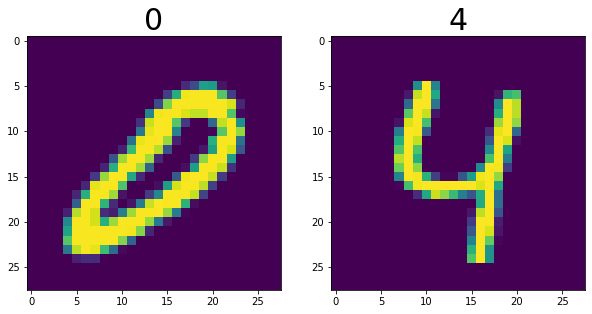

In [ ]:
from numpy.random import randint as randint

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
rand = randint(size)
image_and_label(ax1,x_train,y_train,rand)
rand = randint(test_size)
image_and_label(ax2,x_test,y_test,rand)
plt.show()

In [ ]:
from sklearn import metrics

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train.reshape(size,-1),y_train)
y_pred = clf.predict(x_test.reshape(test_size,-1))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.82      0.86      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.84      0.85       892
           6       0.89      0.88      0.88       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 915,    0,    4,    8,    5,   11,   14,    4,    8,   11],
       [   0, 1090,    8,   11,    1,    6,    8,    1,    9,    1],
       [  15,    7,  879,   33,   14,    9,   11,   24,   30,   10],
       [  11,    5,   29,  865,    7,   37,    4,    9,   23,   20],
       [   5,    2,    7,    5,  865,    8,   15,   11,   21,   43],
       [  13,    7,    3,   50,    6,  751,   23,    6,   21,   12],
       [  16,    3,   15,   10,   22,   20,  841,    2,   25,    4],
       [   2,   12,   26,   13,    6,    6,    4,  929,    9,   21],
       [  10,    7,   29,   41,   17,   27,   16,   10,  788,   29],
       [  14,    2,   11,   20,   41,    8,    9,   20,   28,  856]])

### Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(x_train.reshape(size,-1), y_train)
y_pred = clf.predict(x_test.reshape(test_size,-1))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 969,    0,    0,    0,    0,    2,    5,    1,    3,    0],
       [   0, 1124,    2,    3,    0,    2,    2,    1,    1,    0],
       [   5,    0,  999,    7,    2,    0,    3,    9,    7,    0],
       [   1,    0,   10,  971,    0,   10,    0,    8,    8,    2],
       [   1,    0,    1,    0,  958,    0,    6,    0,    2,   14],
       [   3,    0,    0,   11,    0,  862,    8,    2,    4,    2],
       [   6,    3,    0,    0,    3,    4,  939,    0,    3,    0],
       [   1,    3,   20,    1,    0,    0,    0,  989,    3,   11],
       [   5,    0,    5,    6,    4,    9,    4,    4,  928,    9],
       [   8,    5,    1,    9,    8,    3,    1,    4,    4,  966]])

### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train.reshape(size,-1),y_train)
y_pred = clf.predict(x_test.reshape(test_size,-1))
print(metrics.classification_report(y_test,y_pred))

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
clf = RadiusNeighborsClassifier(radius = 1.0)
clf.fit(x_train.reshape(size,-1),y_train)
y_pred = clf.predict(x_test.reshape(test_size,-1))
print(metrics.classification_report(y_test,y_pred))

ValueError: ignored